# 그룹 연산
 - 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산 이라 함
 - 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
 - 그룹 객체 만들기(분할)
 - 그룹 연산 메소드(적용, 결합)

In [3]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
print('승객 수:', len(df))
print(df.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [6]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [8]:
#클래스를 그룹별로 나누어서 출력
grouped = df.groupby(['class'])
list(grouped)

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

In [9]:
#for 문으 로 가능
for key, group in grouped:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head())

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [10]:
# 평균값 (상대적인 생존율을 알 수 있다.)
# age는 category화 하여 구해야 한다.
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [11]:
# 가장 큰 값
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [15]:
# Q. 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약도를 출력하시요.
group3 = grouped.get_group('Third')
group3.describe()
# count 갯수  age의 소수점은 month임

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [17]:
# class 열 , sex열을 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex'])
for key, group in grouped_two:
    print('*key:',key)
    print('*number:', len(group))
    print(group.head)

*key: ('First', 'female')
*number: 94
<bound method NDFrame.head of       age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]>
*key: ('First', 'male')
*number: 122
<bound method NDFrame.head of       age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       ...


In [18]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [19]:
# Q. ('Third',female) 그룹을 선택헤서 group3f에 저장하고 처음 5개행을 출력하세요
group3f = grouped_two.get_group(('Third','female'))
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [20]:
group3f[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


# 적용 - 결합
 데이터 집계(aggregation)-agg
   -  집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드를 사용
   -  모든 열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,.....])
   -  각 열마다 다른 함수를 매핑 : group객체.agg({'열1':함수1,'열2':함수2,...})
  
  변환(transform)
   -  원소의 본래 해 인덱스와 열 이름을 기준으로 연산 결과를 반환
   -  데이터 변환 연산 : group객체.transform(맵핑함수)
 
 필터링(filter)
   -  그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
   -  그룹 객체 필터링 : group 객체.filter(조건 함수식)
  
 객체 함수 매핑(apply)
   -  pandas 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
   -  group객체. apply(매핑함수)

In [ ]:
# Q 최대값 - 최소값을 반환하는 사용자 함수를 정의하고  agg() 함수에 인수로 전달하여 그룹별로 집계하여 
#agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.

In [ ]:
# Q. grouped의 모든 열에 min , max 함수를 적용하여 출력하세요.

In [29]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])
grouped.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
9,14.0,female,Second,30.0708,1


In [30]:
agg_all = grouped.agg(['min','max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [ ]:
# Q. grouped에서 age열은 mean, fare열은 min, max 함수를 적용하여 출력하세요

In [38]:
agg_sep = grouped.agg({'age':'mean','fare':('min','max')})
agg_sep

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [ ]:
# Q. 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행을 출력하세요

In [40]:
grouped.filter(lambda x: len(x)>=200).head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [43]:
grouped_filter = grouped.filter(lambda x: len(x)>=200)
print(grouped_filter,'\n')
grouped_filter.value_counts('class')

      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
1    38.0  female  First  71.2833         1
2    26.0  female  Third   7.9250         1
3    35.0  female  First  53.1000         1
4    35.0    male  Third   8.0500         0
..    ...     ...    ...      ...       ...
885  39.0  female  Third  29.1250         0
887  19.0  female  First  30.0000         1
888   NaN  female  Third  23.4500         0
889  26.0    male  First  30.0000         1
890  32.0    male  Third   7.7500         0

[707 rows x 5 columns] 



class
Third     491
First     216
Second      0
dtype: int64

In [49]:
#Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행 출력
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)     # 그룹(클래스)로 먼저 30보다 작은걸 고른후에 그후에 출력됨

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [ ]:
# Q. 각 그룹별 통계 요약표를 작성하세요.

In [50]:
for key, group in grouped:
    print(key, group.describe(),'\n')


First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [51]:
agg_grouped = grouped.apply(lambda x:x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [ ]:
# Q. 평균값에서 표준편차의 몇 배 떨어져 있는지를 평가하는 사용자 함수를 작성하세요

In [58]:
def z_score(x):
    return (x-x.mean())/x.std()

In [ ]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform() 함수로 변환하세요.

In [62]:
grouped.age.transform(z_score)

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [ ]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply() 함수로 매핑하여 출력하세요

In [63]:
grouped.age.apply(z_score)


0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [64]:
grouped[['age']].apply(lambda x:z_score(x))

,age
0,-0.251342
1,-0.015770
2,0.068776
3,-0.218434
4,0.789041
...,...
886,-0.205529
887,-1.299306
888,NaN
889,-0.826424


In [67]:
df1 = df.groupby(['class','sex'])
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
# Q. class 값이 First인 행을 선택하여 출력하세요.

In [69]:
df2 = df1.mean()
print(df2,'\n')
type(df2)

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447 



pandas.core.frame.DataFrame

In [70]:
df2.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [ ]:
# Q. class 값이 First이고 sex값이 female인 행을 선택하여 출력하세요.

In [72]:
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

# 피벗(pivot)

 - 피벗 테이블을 구성하는 4가지 요소 ( 행 인덱스, 열 인덱스 데이터 값, 데이터 집계함수)에 적용할
 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달 


In [6]:
import pandas as pd
df2 = pd.read_pickle('./dataset/df2.pkl')
df2.head()

,0,1,2,3,4,5
0,NaN,c0,c1,c2,c3,c4
1,0.0,0,1,2,3,4
2,1.0,5,6,7,8,9


In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [12]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계(pivot-table)
pdf1 = pd.pivot_table(df,
                    index = 'class', #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = 'age',  #데이터로 사용할 열 
                    aggfunc = 'mean') #데이터 집계 함수(나이에 대한 평균)
pdf1.head()

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


In [15]:
# 평균과 합계를 동시에 출력하기  (mean >> 전체 인원중에서 생존한 사람의 비율을 평균으로 나타냄)
pdf2 = pd.pivot_table(df,
                    index = 'class', #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = 'survived',  #데이터로 사용할 열 
                    aggfunc = ['mean','sum']) #데이터 집계 함수(나이에 대한 평균)
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [19]:

pdf3 = pd.pivot_table(df,
                    index = ['class','sex'], #행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['age','fare'],  #데이터로 사용할 열 
                    aggfunc = ['mean','max']) #데이터 집계 함수(평균, 최대값)
pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [32]:
# Q. 타이타닉 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 2가지 이상의 인사이트를 기술하세요

pdf4 = pd.pivot_table(df,
                      index = ['class'],
                      columns = 'survived',
                      values = ['age','fare'],
                      aggfunc = ['mean'])
pdf4.head()

mean                                 
                age                  fare           
survived          0          1          0          1
class                                               
First     43.695312  35.368197  64.684007  95.608029
Second    33.544444  25.901566  19.412328  22.055700
Third     26.555556  20.646118  13.669364  13.694887

In [34]:
pdf5 = pd.pivot_table(df,index = ['class'], #행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = ['fare'], #데이터로 사용할 열
                    aggfunc = ['max','mean'] #데이터 집계 함수
                     ) 
display(pdf5)


max                  mean           
            fare                  fare           
sex       female      male      female       male
class                                            
First   512.3292  512.3292  106.125798  67.226127
Second   65.0000   73.5000   21.970121  19.741782
Third    69.5500   69.5500   16.118810  12.661633

In [35]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf.head()


mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

시계열 데이터
- df의 행 인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용함
- 특정 시점을 기록하는 timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datatime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timetable를 나타내는 datetime64 자료형으로 변환 가능
- 파이썬에서는 다른기능(datetime을 daytime로 변경)

In [36]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [38]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [40]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [41]:
# 원상복구
df1 = df1.reset_index()
df1.head()  #new-data가 다시 하나의 colemn으로 된다.

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [43]:
df1 = df.copy()  #year만 추출 
df1['year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [53]:
df1 = df.copy()  #month만 추출 
df1['month'] = df1.new_Date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,6


In [54]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,6,2018-06


In [55]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume,month,Date_m
new_Date,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,6,2018-06


In [60]:
#특정한 년,월을 출력
df_y = df1.loc['2018-06']
df_y

,Close,Start,High,Low,Volume,month,Date_m
new_Date,,,,,,,
2018-06-29,10700,10550,10900,9990,170253,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,6,2018-06
2018-06-25,11150,11400,11450,11000,55519,6,2018-06
2018-06-22,11300,11250,11450,10750,134805,6,2018-06
2018-06-21,11200,11350,11750,11200,133002,6,2018-06
2018-06-20,11550,11200,11600,10900,308596,6,2018-06
2018-06-19,11300,11850,11950,11300,180656,6,2018-06


In [61]:
# 특정일로부터 start부터 high까지  출력
df_d = df1.loc['2018-06-27','Start':'High']
df_d.head()

,Start,High
new_Date,,
2018-06-27,10800,11050


In [62]:
# 날짜 간격을 알아보기 위해서(2018.12.25일을 기준으로 날짜 간격을 나타낼 수 있다.)
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday  -  df1.index   #delta는 차이를 표현하는 문자
df1.set_index('time_delta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,month,Date_m
time_delta,,,,,,,
176 days,10100,10850,10900,10000,137977,7,2018-07
179 days,10700,10550,10900,9990,170253,6,2018-06
180 days,10400,10900,10950,10150,155769,6,2018-06
181 days,10900,10800,11050,10500,133548,6,2018-06
182 days,10800,10900,11000,10700,63039,6,2018-06


In [100]:
#시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                     end = None,
                     periods = 12,
                     freq = 'MS',  #'MonthStart' => 월초를 나타냄, M => 월말, 3M => 3개월
                     tz = 'Asia/Seoul')     #timezone
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [86]:
# 이미 들어간 파일에 시계열 데이터를 넣어보기
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms   #index >> colemn이름이 인덱스임
df_a.head()

,Close,Start,High,Low,Volume,month,Date_m,index
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,6,2018-06,2019-05-01 00:00:00+09:00


In [87]:
#여기서 월만 뽑는 경우
#df_a.drop('Month',axis=1,inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,month,Date_m,index,Month
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,7,2018-07,2019-01-01 00:00:00+09:00,1
179 days,10700,10550,10900,9990,170253,6,2018-06,2019-02-01 00:00:00+09:00,2
180 days,10400,10900,10950,10150,155769,6,2018-06,2019-03-01 00:00:00+09:00,3
181 days,10900,10800,11050,10500,133548,6,2018-06,2019-04-01 00:00:00+09:00,4
182 days,10800,10900,11000,10700,63039,6,2018-06,2019-05-01 00:00:00+09:00,5


In [88]:
#Month를 제거
df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,month,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,7,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,6,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,6,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,6,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,6,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

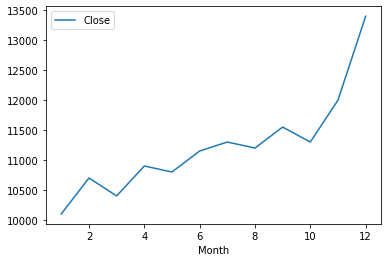

In [73]:
# 그래프 그리기
df_g = df_a[['Close']]
df_g.plot()

In [94]:
#Month를 제거
#df_r = df_a.reset_index()
#df_r
df_a = df_r.set_index('index')
df_a.head()

,Month,Close,Start,High,Low,Volume,month,Date_m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,7,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,6,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,6,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,6,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,6,2018-06


In [96]:
#내림차순
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

,Month,Close,Start,High,Low,Volume,month,Date_m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,6,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,6,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,6,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,6,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,6,2018-06


In [97]:
#colemn의 값을 기준으로 할때는 value로 하여 작성한다.
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

,Month,Close,Start,High,Low,Volume,month,Date_m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,6,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,6,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,6,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,6,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,6,2018-06


In [104]:
# Period Range(Period 배열)
pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods =3,
                      freq = 'M')   #기간에는 월초 월말 의미가 없다
print(pr_m,'\n')
pr_h = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods =3,
                      freq = '2H')   # H => 시간
print(pr_h)


PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


python, numpy, panda 날짜 타입 비교 및 정리
https://ellun.tistory.com/320

In [ ]:
#파이썬 보충정리

In [108]:
#timestamp -> str(문자)로 변환
import time
today = time.time()
print(today,type(today),'\n')
s = str(today)
print(s,type(s))

1642396274.8539155 <class 'float'> 

1642396274.8539155 <class 'str'>


In [115]:
# datetime을 ->  str(문자)로(python)
from datetime import datetime
s = datetime.now().strftime( '%Y-%m-%d %H:%M:%S')  #strftime을 사용한다. 괄호안에는 원하는 시간을 넣는다.
print(s,type(s))

2022-01-17 14:15:55 <class 'str'>


In [117]:
#str -> timestamp(판다스가 아님)
from datetime import datetime
import time
s = '2022-01-17 14:15:55'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())  #(ts => timestamp), strptime으로 사용
print(ts)

1642396555.0


In [121]:
# str => datetime
s = '2022-01-17 14:15:55'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

2022-01-17 14:15:55 <class 'datetime.datetime'>


In [120]:
# datetime => timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:21:43.413297 <class 'datetime.datetime'> 

1642396903.0 <class 'float'>


In [ ]:
# Q.[과제] 1)str -> datetime ,2) datetime -> str -> timestamp, 3)timestamp -> str -> datetime

In [123]:
#1.
from datetime import datetime
import time
s = '2022-01-17 14:15:55'

'2022-01-17 14:15:55'

In [124]:

s = '2022-01-17 14:15:55'
dt2 = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt2))

2022-01-17 14:15:55 <class 'datetime.datetime'>


In [127]:
#2
s5 = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s5,type(s5))

2022-01-17 14:34:52 <class 'str'>


In [128]:
s = '2022-01-17 14:34:52'
ts4 = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
print(ts4)

1642397692.0


In [140]:
#3 
import time
today = time.time()
print(today,type(today),'\n')
s10 = str(today)
print(s,type(s10))

1642399355.052703 <class 'float'> 

2022-01-17 14:34:52 <class 'str'>


In [155]:
s10 = '2022-01-17 14:34:52'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

AttributeError: module 'datetime' has no attribute 'strptime'

In [130]:
#1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime 

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 17, 564387)

In [131]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [138]:
# 특정 요일 구하기
import datetime   # 위에 있는 datetime보다 큰 개념  위에 있는 사이트 참조
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]   # 월요일부터 인덱스 0이 된다.
get_yoil(2022,1,17)

'MON'

#-------------------- -----------------------------------------------------

In [144]:
# 판다스 이용
t = pd.Timestamp(1513393335, unit='s', tz='US/Pacific')
print(t,type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [145]:
todya = time.time()
today

1642399355.052703

In [146]:
date = pd.Timestamp(1642399355.052703, unit='s', tz = 'ASIA/Seoul')
print(date, type(date))

2022-01-17 15:02:35.052702904+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [148]:
pd.to_datetime([1,2,3], unit = 'D', origin = pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [150]:
pr_m = pd.period_range(start='2019-01-01', end=None, periods =3, freq = 'M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [154]:
# 날짜별로 데이타를 만들어보기 - 
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01', periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1297,91.29
1,2021-01-02,1762,28.07
2,2021-01-03,1793,80.69
3,2021-01-04,1694,83.70
4,2021-01-05,1954,80.67


In [160]:
# Q. stock-data.csv를  datetime64 자료형으로 변환환후 년 월 일로 분리하고 year를 인덱스로 세팅하여 출력하세요

In [157]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [165]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        20 non-null     object        
 1   Close       20 non-null     int64         
 2   Start       20 non-null     int64         
 3   High        20 non-null     int64         
 4   Low         20 non-null     int64         
 5   Volume      20 non-null     int64         
 6   stock_data  20 non-null     datetime64[ns]
 7   new_Date    20 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 1.4+ KB


In [166]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume,stock_data
new_Date,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018-07-02
2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2018-06-28,10400,10900,10950,10150,155769,2018-06-28
2018-06-27,10900,10800,11050,10500,133548,2018-06-27
2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [167]:
df1 = df.copy()  #year만 추출 
df1['year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,stock_data,new_Date,year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018-06-26,2018


In [168]:
df1 = df.copy()   
df1['month'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,stock_data,new_Date,month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018-06-26,2018


In [169]:
df1 = df.copy()  
df1['day'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,stock_data,new_Date,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018-06-26,2018


In [ ]:
# Q. stock-data.csv를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 period로 변환하고 년원일을 표기 변경하여
#인덱스로 세팅하여 출력하세요

In [171]:
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [172]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [173]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [175]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1 = df.copy()
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018-06


In [200]:
df =pd.read_csv('./dataset/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#[과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요

In [189]:
#df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
#df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [260]:
df2 =df.copy()
df['kpl'] = round(df2['mpg']*mpg_to_kpl,2)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.23


In [261]:
df2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
kpl             float64
dtype: object

In [ ]:
#[과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 된 이유 및 float처리)
#hint: np.nan으로 대체  (특수문자를 np.nan으로 대체)

In [262]:
df2['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [264]:
 # horsepower 숫자들 중에서 숫자가 아닌 ?가 존재한다. 
 # 특수문자를 대체해야함 
df2['horsepower'].replace("?",np.nan,inplace=True)
df2['horsepower']= df['horsepower'].astype('float')
print(df2['horsepower'].dtype)

float64


In [265]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 31.2+ KB


In [266]:
df2['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [213]:
#[과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN값의 개수를 NAN값 처리 전 후로 비교하세요
print('nan')

nan


In [320]:
#[과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장후 다시 불러오세요.
df2.to_pickle('./dataset/auto-df.pkl')
df9 = pd.read_pickle('./dataset/auto-df.pkl')
df9

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,horsepower_abs,horsepower_mol
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.65,0.565217,0.456522
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.38,0.717391,0.646739
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.65,0.652174,0.565217
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.80,0.652174,0.565217
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.23,0.608696,0.510870
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,11.48,0.373913,0.217391
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,18.71,0.226087,0.032609
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,13.60,0.365217,0.206522
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,11.90,0.343478,0.179348


In [267]:
#[과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.
#절대값 abs
df2['horsepower_abs'] = df2['horsepower']/abs(df2['horsepower'].max())
df2[['horsepower','horsepower_abs']]

,horsepower,horsepower_abs
0,130.0,0.565217
1,165.0,0.717391
2,150.0,0.652174
3,150.0,0.652174
4,140.0,0.608696
...,...,...
393,86.0,0.373913
394,52.0,0.226087
395,84.0,0.365217
396,79.0,0.343478


In [ ]:
#[과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요.

In [268]:
min_m = df2['horsepower'] - df2['horsepower'].min()   #분자
min_max = df2['horsepower'].max() - df2['horsepower'].min()  #분모
df2['horsepower_mol'] = min_m/min_max
df2[['horsepower','horsepower_mol']]

,horsepower,horsepower_mol
0,130.0,0.456522
1,165.0,0.646739
2,150.0,0.565217
3,150.0,0.565217
4,140.0,0.510870
...,...,...
393,86.0,0.217391
394,52.0,0.032609
395,84.0,0.206522
396,79.0,0.179348


In [ ]:
#[과제] origin열의 고유값을 출력하세요.

In [270]:
df1 = df.copy()

In [271]:
pd.unique(df1['origin'])

array([1, 3, 2], dtype=int64)

In [ ]:
#[과제] 정수형 데이터를 문자형 데이터로 변환한 후 고류값을 출력하세요(1:'USA', 2:'EU', 3:'JAPAN')

In [272]:
df1 = df1[['origin']].astype(str)
df1
df1['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
#[과제] origin열의 자료형을 확인하고 범주형으로 변환하여 출력하세요.

In [273]:
df1['origin'].dtype 

dtype('O')

In [278]:
df1['origin'] = df1[['origin']].astype('category')
print(df1['origin'].dtype)

object


In [ ]:
#[과제] origin열을 범주형에서 문자열로 변환한후 자료형을 출력하세요.

In [250]:
df1 = df1[['origin']].astype(str)
df1
df1['origin'].dtype

dtype('O')

In [ ]:
#[과제] horsepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
#np.histogram() 함수로 3개의 bin으로 나눔

In [314]:
df7 = df.copy()
df7.dropna(subset=['horsepower'],axis=0,inplace=True)
df7['horsepower'] = df['horsepower'].astype('float')

In [316]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    int64   
 8   car name      392 non-null    object  
 9   kpl           392 non-null    float64 
 10  df_bins       392 non-null    category
 11  hp_bins       392 non-null    category
dtypes: category(2), float64(5), int64(4), object(1)
memory usage: 34.7+ KB


In [317]:
count, bins_dividers = np.histogram(df7['horsepower'], bins=3)
print(count)
print(bins_dividers)

[257 103  32]
[ 46.         107.33333333 168.66666667 230.        ]


In [319]:
bin_names = ['저출력','보통출력','고출력']
df['df_bins'] = pd.cut(x = df7['horsepower'],    # 데이터 배열
                       bins = bins_dividers,     # 경계값 리스트
                       labels = bin_names,       # 구간명
                       include_lowest =True)     # 첫 경계값 포함여부(구간의 하위값)
df7.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,df_bins,hp_bins
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.65,보통출력,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.38,보통출력,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.65,보통출력,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.80,보통출력,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.23,보통출력,보통출력


In [ ]:
#[과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한후 통계요약표를 출력하세요.

In [285]:
# 준비과정  1. ?를 nan으로 변경, 2. 누락값을 없앰  3. 문자열을 실수로 바꿈
auto_df = df.copy()
auto_df['horsepower'].replace('?',np.nan,inplace=True)
auto_df.dropna(subset=['horsepower'],axis=0,inplace=True)   
auto_df['horsepower']=auto_df['horsepower'].astype('float')

# horsepower 통계요약정보로 최대값확인
print(auto_df.horsepower.describe())
print()

#horsepower 최대값의 절대값으로 모든 데이터를 나눠서 저장
auto_df.horsepower = auto_df.horsepower / abs(auto_df.horsepower.max())

print(auto_df.horsepower.head())
print()
print(auto_df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64
